# Índice
<hr>

1. [Cargar datos](#cargar-datos)  
   Cargar archivos .pdbqt, .csv y otros datos necesarios.  

2. [Codigo para PLIP](#codigo-para-plip)  
   Unir, filtrar y transformar los datos de las bases iniciales.  

3. [Analizar inhibidores](#analizar-inhibidores)  
   Comparar resultados y extraer información clave de los ligandos.


# Cargar datos
<hr>

In [1]:
import pandas as pd

In [6]:
df_duales = pd.read_csv("df_mejores/Inhibidores/duales.csv")
df_Bases = pd.read_csv("df_mejores/Bases/bases.csv")

In [7]:
df_duales.shape

(105, 6)

In [8]:
df_Bases.shape

(66, 12)

# Codigo para PLIP
<hr>

#Codigo para analisis de interacciones

In [9]:
import glob
import os
import subprocess
import glob
from collections import Counter
import pandas as pd
from pandas import DataFrame


def arregla_LU(x):
    lista = [', ;']
    if type(x)==str:
        for l in lista:
            x=x.replace(l,';')
        return x
    else:
        return x

def tabla_inter(lista):
  '''Tipo de interacciones de cada ligando en tabla'''
  ligandos = []
  hi_i = {}
  hb_i = {}
  sb_i = {}
  pi_s_i = {}
  halb_i = {}
  met_i = {}
  wat_i = {}
  picat_i = {}

  for i in lista:
      lig = i.split('/')[-2].replace('complejo_','')#.split('_')[-1]
      #print(lig)
      ligandos.append(lig)
      entrar=open(i.strip() + 'report.txt','r') # para entrar a cada carpeta
      entrar=[i for i in entrar.readlines()]
      resid=[]
      tipos = []
      for i in entrar:
          if '**' in i:
              tip=i[2:-4].strip()
              tipos.append(tip)
          elif i.count('|') > 1 and not 'RESNR' in i:
              resid.append(lig+' '+tip+' '+i.split()[3]+' '+i.split()[1])

      aa = {'CYS': 'C', 'ASP': 'D', 'SER': 'S', 'GLN': 'Q', 'LYS': 'K',
      'ILE': 'I', 'PRO': 'P', 'THR': 'T', 'PHE': 'F', 'ASN': 'N',
      'GLY': 'G', 'HIS': 'H', 'LEU': 'L', 'ARG': 'R', 'TRP': 'W',
      'ALA': 'A', 'VAL':'V', 'GLU': 'E', 'TYR': 'Y', 'MET': 'M','UNK':'lig','UNL':'UNL'}

      lig_hi = []
      lig_hb = []
      lig_sb = []
      lig_pis = []
      lig_halb = []
      lig_met = []
      lig_wat = []
      lig_picat = []
      for i in resid:
          if 'Hydrophobic' in i:
              lig_hi.append(i.split()[0]+' '+aa[i.split()[3]]+i.split()[4])
          elif 'Hydrogen' in i:
              lig_hb.append(i.split()[0]+' '+aa[i.split()[3]]+i.split()[4])
              #print(i.split())
          elif 'Salt Bridge' in i:
              lig_sb.append(i.split()[0]+' '+aa[i.split()[3]]+i.split()[4])
          elif 'pi-Stackin' in i:
              lig_pis.append(i.split()[0]+' '+aa[i.split()[2]]+i.split()[3])
              #print(i.split())
          elif 'Halogen Bond' in i:
              lig_halb.append(i.split()[0]+' '+aa[i.split()[3]]+i.split()[4])
          elif 'Metal Complexe' in i:
              #print(i)
              lig_met.append(i.split()[0]+' '+aa[i.split()[3]]+i.split()[4])
          elif 'Water Bridge' in i:
              lig_wat.append(i.split()[0]+' '+aa[i.split()[3]]+i.split()[4])
          elif 'pi-Cation Interaction' in i:
              lig_picat.append(i.split()[0]+' '+aa[i.split()[3]]+i.split()[4])

      hi = Counter(lig_hi)
      hb = Counter(lig_hb)
      sb = Counter(lig_sb)
      pi_s = Counter(lig_pis)
      halb = Counter(lig_halb)
      met = Counter(lig_met)
      wat = Counter(lig_wat)
      picat = Counter(lig_picat)

      hi_prueba = []
      hi_residuo = ''
      for a,b in hi.items():
          hi_prueba.append(a.split()[0])
          hi_residuo+=a.split()[1]+', '
      
      hi_i[str(set(hi_prueba))[2:-2]] = 'HI. '+hi_residuo

      hb_prueba = []
      hb_residuo = ''
      for a,b in hb.items():
          hb_prueba.append(a.split()[0])
          hb_residuo+=a.split()[1]+', '
      hb_i[str(set(hb_prueba))[2:-2]] = '; HB. '+hb_residuo

      sb_prueba = []
      sb_residuo = ''
      for a,b in sb.items():
          sb_prueba.append(a.split()[0])
          sb_residuo+=a.split()[1]+', '
      sb_i[str(set(sb_prueba))[2:-2]] = '; SB. '+sb_residuo

      pi_s_prueba = []
      pi_s_residuo = ''
      for a,b in pi_s.items():
          pi_s_prueba.append(a.split()[0])
          pi_s_residuo+=a.split()[1]+', '
      pi_s_i[str(set(pi_s_prueba))[2:-2]] = '; π-s. '+pi_s_residuo

      halb_prueba = []
      halb_residuo = ''
      for a,b in halb.items():
          halb_prueba.append(a.split()[0])
          halb_residuo+=a.split()[1]+', '
      halb_i[str(set(halb_prueba))[2:-2]] = '; HalB. '+halb_residuo

      met_prueba = []
      met_residuo = ''
      for a,b in met.items():
          met_prueba.append(a.split()[0])
          met_residuo+=a.split()[1]+', '
      met_i[str(set(met_prueba))[2:-2]] = '; Met. '+met_residuo

      wat_prueba = []
      wat_residuo = ''
      for a,b in wat.items():
          wat_prueba.append(a.split()[0])
          wat_residuo+=a.split()[1]+', '
      wat_i[str(set(wat_prueba))[2:-2]] = '; Wat. '+wat_residuo

      picat_prueba = []
      picat_residuo = ''
      for a,b in picat.items():
          picat_prueba.append(a.split()[0])
          picat_residuo+=a.split()[1]+', '
      picat_i[str(set(picat_prueba))[2:-2]] = '; π-c. '+picat_residuo

  col = ['ligandos']
  tabla = pd.DataFrame(ligandos,columns=col)
  tabla = tabla.sort_values(by=['ligandos'], ascending=True)
  tabla['HI'] = tabla['ligandos'].map(hi_i)
  tabla['HB'] = tabla['ligandos'].map(hb_i)
  tabla['SB'] = tabla['ligandos'].map(sb_i)
  tabla['π-s'] = tabla['ligandos'].map(pi_s_i)
  tabla['HalB'] = tabla['ligandos'].map(halb_i)
  tabla['Met_com'] = tabla['ligandos'].map(met_i)
  tabla['WB'] = tabla['ligandos'].map(wat_i)
  tabla['π-c'] = tabla['ligandos'].map(picat_i)
  tabla = tabla.fillna('')
  tabla["Interacciones"] = tabla["HI"] + tabla["HB"] + tabla["SB"] + tabla["π-s"] + tabla["HalB"] + tabla["Met_com"] + tabla["WB"] + tabla["π-c"]
  guardar = tabla[['ligandos','Interacciones']]
  guardar['Interacciones'] = guardar['Interacciones'].apply(arregla_LU)
  guardar['Interacciones'] = guardar['Interacciones'].apply(lambda x: x[:-2]+'.')

  # Nombre de la tabla de interacciones
  nom_tab_inter = "Interacciones"
  guardar.to_csv(nom_tab_inter+'.csv')
  return guardar


In [10]:
df_Bases

,Molecula,Afinidad_1,Afinidad_2,CNN afinity_1,CNN afinity_2,CNN_1,CNN_2,Ruta_1,Ruta_2,Target_1,Target_2,Targets
0,EGFR_MAPK1_101,-10.027432,-10.522901,('A',('A',active,active,Mejores_poses/bases_conjuntas/EGFR_MAPK1_101_E...,Mejores_poses/bases_conjuntas/EGFR_MAPK1_101_M...,EGFR,MAPK1,EGFR_MAPK1
1,EGFR_MAPK1_114,-9.835052,-10.348002,('A',('A',active,active,Mejores_poses/bases_conjuntas/EGFR_MAPK1_114_E...,Mejores_poses/bases_conjuntas/EGFR_MAPK1_114_M...,EGFR,MAPK1,EGFR_MAPK1
2,EGFR_MAPK1_117,-10.195214,-10.207559,('A',('A',active,active,Mejores_poses/bases_conjuntas/EGFR_MAPK1_117_E...,Mejores_poses/bases_conjuntas/EGFR_MAPK1_117_M...,EGFR,MAPK1,EGFR_MAPK1
3,EGFR_MAPK1_134,-10.132882,-10.266725,('A',('A',active,active,Mejores_poses/bases_conjuntas/EGFR_MAPK1_134_E...,Mejores_poses/bases_conjuntas/EGFR_MAPK1_134_M...,EGFR,MAPK1,EGFR_MAPK1
4,EGFR_MAPK1_136,-9.852680,-10.731030,('A',('A',active,active,Mejores_poses/bases_conjuntas/EGFR_MAPK1_136_E...,Mejores_poses/bases_conjuntas/EGFR_MAPK1_136_M...,EGFR,MAPK1,EGFR_MAPK1
...,...,...,...,...,...,...,...,...,...,...,...,...
61,EGFR_SRC_564,-11.626127,-9.953917,('A',('A',active,active,Mejores_poses/bases_conjuntas/EGFR_SRC_564_EGF...,Mejores_poses/bases_conjuntas/EGFR_SRC_564_SRC...,EGFR,SRC,EGFR_SRC
62,EGFR_SRC_565,-11.939290,-10.491311,('A',('A',active,active,Mejores_poses/bases_conjuntas/EGFR_SRC_565_EGF...,Mejores_poses/bases_conjuntas/EGFR_SRC_565_SRC...,EGFR,SRC,EGFR_SRC
63,EGFR_SRC_566,-11.901248,-10.111121,('A',('A',active,active,Mejores_poses/bases_conjuntas/EGFR_SRC_566_EGF...,Mejores_poses/bases_conjuntas/EGFR_SRC_566_SRC...,EGFR,SRC,EGFR_SRC
64,EGFR_SRC_567,-11.347662,-10.426674,('A',('A',active,active,Mejores_poses/bases_conjuntas/EGFR_SRC_567_EGF...,Mejores_poses/bases_conjuntas/EGFR_SRC_567_SRC...,EGFR,SRC,EGFR_SRC


# Crear PDBS
<hr>

In [11]:
# -------------------------------------- CREAR PDBS PARA LOS COMPUESTOS DE LAS BASES --------------------------------------

# Importar librerías
import glob
import os
import subprocess

# Definir rutas de los compuestos en pdbqt para las dos proteínas
ruta_1 = df_Bases["Ruta_1"]
ruta_2 = df_Bases["Ruta_2"]

# Definir la ruta de salida para los archivos PDB
ruta_salida = "PDBS/Bases"
os.makedirs(ruta_salida, exist_ok=True)

# Definir en el df las rutas de salida de los PDBs
df_Bases["Ruta_PDB_1"] = df_Bases.apply(
    lambda row: os.path.join(ruta_salida, f"{row['Molecula']}_L_{row['Target_1']}.pdb"),
    axis=1
)
df_Bases["Ruta_PDB_2"] = df_Bases.apply(
    lambda row: os.path.join(ruta_salida, f"{row['Molecula']}_L_{row['Target_2']}.pdb"),
    axis=1
)

# Convertir cada archivo
for index, row in df_Bases.iterrows():

    print(row["Ruta_1"])

    cmd1 = ["obabel", "-ipdbqt", row["Ruta_1"], "-opdb", "-O", row["Ruta_PDB_1"]]
    cmd2 = ["obabel", "-ipdbqt", row["Ruta_2"], "-opdb", "-O", row["Ruta_PDB_2"]]

    subprocess.run(cmd1, check=True)
    subprocess.run(cmd2, check=True)

    # Procesar PDB 1: reemplazar "ATOM" por "HETATM" y eliminar "CONECT"
    with open(row["Ruta_PDB_1"], "r") as f:
        lines = f.readlines()

    with open(row["Ruta_PDB_1"], "w") as f:
        for line in lines:
            if line.startswith("CONECT"):
                continue
            if line.startswith("ATOM"):
                line = "HETATM" + line[6:]
            f.write(line)

    # Procesar PDB 2: reemplazar "ATOM" por "HETATM" y eliminar "CONECT"
    with open(row["Ruta_PDB_2"], "r") as f:
        lines = f.readlines()

    with open(row["Ruta_PDB_2"], "w") as f:
        for line in lines:
            if line.startswith("CONECT"):
                continue
            if line.startswith("ATOM"):
                line = "HETATM" + line[6:]
            f.write(line)

    print(f'Convertida la molécula: {row["Molecula"]}')


Mejores_poses/bases_conjuntas/EGFR_MAPK1_101_EGFR.pdbqt


*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/bases_conjuntas/EGFR_MAPK1_101_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/bases_conjuntas/EGFR_MAPK1_101_MAPK1.pdbqt)

1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


Convertida la molécula: EGFR_MAPK1_101
Mejores_poses/bases_conjuntas/EGFR_MAPK1_114_EGFR.pdbqt
Convertida la molécula: EGFR_MAPK1_114
Mejores_poses/bases_conjuntas/EGFR_MAPK1_117_EGFR.pdbqt
Convertida la molécula: EGFR_MAPK1_117
Mejores_poses/bases_conjuntas/EGFR_MAPK1_134_EGFR.pdbqt
Convertida la molécula: EGFR_MAPK1_134
Mejores_poses/bases_conjuntas/EGFR_MAPK1_136_EGFR.pdbqt


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


Convertida la molécula: EGFR_MAPK1_136
Mejores_poses/bases_conjuntas/EGFR_MAPK1_146_EGFR.pdbqt
Convertida la molécula: EGFR_MAPK1_146
Mejores_poses/bases_conjuntas/EGFR_MAPK1_167_EGFR.pdbqt
Convertida la molécula: EGFR_MAPK1_167
Mejores_poses/bases_conjuntas/EGFR_MAPK1_180_EGFR.pdbqt


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


Convertida la molécula: EGFR_MAPK1_180
Mejores_poses/bases_conjuntas/EGFR_MAPK1_219_EGFR.pdbqt
Convertida la molécula: EGFR_MAPK1_219
Mejores_poses/bases_conjuntas/EGFR_MAPK1_223_EGFR.pdbqt
Convertida la molécula: EGFR_MAPK1_223
Mejores_poses/bases_conjuntas/EGFR_MAPK1_243_EGFR.pdbqt


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


Convertida la molécula: EGFR_MAPK1_243
Mejores_poses/bases_conjuntas/EGFR_MAPK1_247_EGFR.pdbqt
Convertida la molécula: EGFR_MAPK1_247
Mejores_poses/bases_conjuntas/EGFR_MAPK1_249_EGFR.pdbqt
Convertida la molécula: EGFR_MAPK1_249
Mejores_poses/bases_conjuntas/EGFR_MAPK1_250_EGFR.pdbqt


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


Convertida la molécula: EGFR_MAPK1_250
Mejores_poses/bases_conjuntas/EGFR_MAPK1_267_EGFR.pdbqt
Convertida la molécula: EGFR_MAPK1_267
Mejores_poses/bases_conjuntas/EGFR_MAPK1_277_EGFR.pdbqt
Convertida la molécula: EGFR_MAPK1_277
Mejores_poses/bases_conjuntas/EGFR_MAPK1_28_EGFR.pdbqt


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


Convertida la molécula: EGFR_MAPK1_28
Mejores_poses/bases_conjuntas/EGFR_MAPK1_288_EGFR.pdbqt
Convertida la molécula: EGFR_MAPK1_288
Mejores_poses/bases_conjuntas/EGFR_MAPK1_298_EGFR.pdbqt
Convertida la molécula: EGFR_MAPK1_298
Mejores_poses/bases_conjuntas/EGFR_MAPK1_300_EGFR.pdbqt


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


Convertida la molécula: EGFR_MAPK1_300
Mejores_poses/bases_conjuntas/EGFR_MAPK1_313_EGFR.pdbqt
Convertida la molécula: EGFR_MAPK1_313
Mejores_poses/bases_conjuntas/EGFR_MAPK1_332_EGFR.pdbqt
Convertida la molécula: EGFR_MAPK1_332
Mejores_poses/bases_conjuntas/EGFR_MAPK1_358_EGFR.pdbqt


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


Convertida la molécula: EGFR_MAPK1_358
Mejores_poses/bases_conjuntas/EGFR_MAPK1_36_EGFR.pdbqt
Convertida la molécula: EGFR_MAPK1_36
Mejores_poses/bases_conjuntas/EGFR_MAPK1_362_EGFR.pdbqt
Convertida la molécula: EGFR_MAPK1_362
Mejores_poses/bases_conjuntas/EGFR_MAPK1_365_EGFR.pdbqt


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


Convertida la molécula: EGFR_MAPK1_365
Mejores_poses/bases_conjuntas/EGFR_MAPK1_388_EGFR.pdbqt
Convertida la molécula: EGFR_MAPK1_388
Mejores_poses/bases_conjuntas/EGFR_MAPK1_391_EGFR.pdbqt
Convertida la molécula: EGFR_MAPK1_391
Mejores_poses/bases_conjuntas/EGFR_MAPK1_394_EGFR.pdbqt


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


Convertida la molécula: EGFR_MAPK1_394
Mejores_poses/bases_conjuntas/EGFR_MAPK1_40_EGFR.pdbqt
Convertida la molécula: EGFR_MAPK1_40
Mejores_poses/bases_conjuntas/EGFR_MAPK1_404_EGFR.pdbqt
Convertida la molécula: EGFR_MAPK1_404
Mejores_poses/bases_conjuntas/EGFR_MAPK1_407_EGFR.pdbqt
Convertida la molécula: EGFR_MAPK1_407
Mejores_poses/bases_conjuntas/EGFR_MAPK1_409_EGFR.pdbqt


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


Convertida la molécula: EGFR_MAPK1_409
Mejores_poses/bases_conjuntas/EGFR_MAPK1_433_EGFR.pdbqt
Convertida la molécula: EGFR_MAPK1_433
Mejores_poses/bases_conjuntas/EGFR_MAPK1_440_EGFR.pdbqt
Convertida la molécula: EGFR_MAPK1_440
Mejores_poses/bases_conjuntas/EGFR_MAPK1_441_EGFR.pdbqt
Convertida la molécula: EGFR_MAPK1_441
Mejores_poses/bases_conjuntas/EGFR_MAPK1_453_EGFR.pdbqt


1 molecule converted
1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/bases_conjuntas/EGFR_MAPK1_441_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/bases_conjuntas/EGFR_MAPK1_441_MAPK1.pdbqt)

1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


Convertida la molécula: EGFR_MAPK1_453
Mejores_poses/bases_conjuntas/EGFR_MAPK1_458_EGFR.pdbqt
Convertida la molécula: EGFR_MAPK1_458
Mejores_poses/bases_conjuntas/EGFR_MAPK1_461_EGFR.pdbqt
Convertida la molécula: EGFR_MAPK1_461
Mejores_poses/bases_conjuntas/EGFR_MAPK1_464_EGFR.pdbqt


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


Convertida la molécula: EGFR_MAPK1_464
Mejores_poses/bases_conjuntas/EGFR_MAPK1_48_EGFR.pdbqt
Convertida la molécula: EGFR_MAPK1_48
Mejores_poses/bases_conjuntas/EGFR_MAPK1_486_EGFR.pdbqt
Convertida la molécula: EGFR_MAPK1_486
Mejores_poses/bases_conjuntas/EGFR_MAPK1_498_EGFR.pdbqt


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/bases_conjuntas/EGFR_MAPK1_50_EGFR.pdbqt)

1 molecule converted


Convertida la molécula: EGFR_MAPK1_498
Mejores_poses/bases_conjuntas/EGFR_MAPK1_50_EGFR.pdbqt
Convertida la molécula: EGFR_MAPK1_50
Mejores_poses/bases_conjuntas/EGFR_MAPK1_511_EGFR.pdbqt
Convertida la molécula: EGFR_MAPK1_511
Mejores_poses/bases_conjuntas/EGFR_MAPK1_549_EGFR.pdbqt
Convertida la molécula: EGFR_MAPK1_549
Mejores_poses/bases_conjuntas/EGFR_MAPK1_64_EGFR.pdbqt


*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/bases_conjuntas/EGFR_MAPK1_50_MAPK1.pdbqt)

1 molecule converted
1 molecule converted
1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/bases_conjuntas/EGFR_MAPK1_549_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/bases_conjuntas/EGFR_MAPK1_549_MAPK1.pdbqt)

1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


Convertida la molécula: EGFR_MAPK1_64
Mejores_poses/bases_conjuntas/EGFR_MAPK1_75_EGFR.pdbqt
Convertida la molécula: EGFR_MAPK1_75
Mejores_poses/bases_conjuntas/EGFR_MAPK1_82_EGFR.pdbqt
Convertida la molécula: EGFR_MAPK1_82
Mejores_poses/bases_conjuntas/EGFR_MAPK1_88_EGFR.pdbqt


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/bases_conjuntas/EGFR_SRC_555_EGFR.pdbqt)

1 molecule converted


Convertida la molécula: EGFR_MAPK1_88
Mejores_poses/bases_conjuntas/EGFR_MAPK1_89_EGFR.pdbqt
Convertida la molécula: EGFR_MAPK1_89
Mejores_poses/bases_conjuntas/EGFR_MAPK1_92_EGFR.pdbqt
Convertida la molécula: EGFR_MAPK1_92
Mejores_poses/bases_conjuntas/EGFR_SRC_555_EGFR.pdbqt


*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/bases_conjuntas/EGFR_SRC_555_SRC.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/bases_conjuntas/EGFR_SRC_556_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/bases_conjuntas/EGFR_SRC_556_SRC.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/bases_conjuntas/EGFR_SRC_557_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/bases_conjuntas/EGFR_SRC_557_SRC.pdbqt)

1 molecule converted
*** Open Babe

Convertida la molécula: EGFR_SRC_555
Mejores_poses/bases_conjuntas/EGFR_SRC_556_EGFR.pdbqt
Convertida la molécula: EGFR_SRC_556
Mejores_poses/bases_conjuntas/EGFR_SRC_557_EGFR.pdbqt
Convertida la molécula: EGFR_SRC_557
Mejores_poses/bases_conjuntas/EGFR_SRC_558_EGFR.pdbqt


*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/bases_conjuntas/EGFR_SRC_558_SRC.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/bases_conjuntas/EGFR_SRC_559_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/bases_conjuntas/EGFR_SRC_559_SRC.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/bases_conjuntas/EGFR_SRC_560_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/bases_conjuntas/EGFR_SRC_560_SRC.pdbqt)

1 molecule converted
*** Open Babe

Convertida la molécula: EGFR_SRC_558
Mejores_poses/bases_conjuntas/EGFR_SRC_559_EGFR.pdbqt
Convertida la molécula: EGFR_SRC_559
Mejores_poses/bases_conjuntas/EGFR_SRC_560_EGFR.pdbqt
Convertida la molécula: EGFR_SRC_560
Mejores_poses/bases_conjuntas/EGFR_SRC_561_EGFR.pdbqt


*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/bases_conjuntas/EGFR_SRC_561_SRC.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/bases_conjuntas/EGFR_SRC_562_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/bases_conjuntas/EGFR_SRC_562_SRC.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/bases_conjuntas/EGFR_SRC_563_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/bases_conjuntas/EGFR_SRC_563_SRC.pdbqt)

1 molecule converted
*** Open Babe

Convertida la molécula: EGFR_SRC_561
Mejores_poses/bases_conjuntas/EGFR_SRC_562_EGFR.pdbqt
Convertida la molécula: EGFR_SRC_562
Mejores_poses/bases_conjuntas/EGFR_SRC_563_EGFR.pdbqt
Convertida la molécula: EGFR_SRC_563
Mejores_poses/bases_conjuntas/EGFR_SRC_564_EGFR.pdbqt


*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/bases_conjuntas/EGFR_SRC_564_SRC.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/bases_conjuntas/EGFR_SRC_565_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/bases_conjuntas/EGFR_SRC_565_SRC.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/bases_conjuntas/EGFR_SRC_566_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/bases_conjuntas/EGFR_SRC_566_SRC.pdbqt)

1 molecule converted
*** Open Babe

Convertida la molécula: EGFR_SRC_564
Mejores_poses/bases_conjuntas/EGFR_SRC_565_EGFR.pdbqt
Convertida la molécula: EGFR_SRC_565
Mejores_poses/bases_conjuntas/EGFR_SRC_566_EGFR.pdbqt
Convertida la molécula: EGFR_SRC_566
Mejores_poses/bases_conjuntas/EGFR_SRC_567_EGFR.pdbqt
Convertida la molécula: EGFR_SRC_567
Mejores_poses/bases_conjuntas/EGFR_SRC_569_EGFR.pdbqt
Convertida la molécula: EGFR_SRC_569


*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/bases_conjuntas/EGFR_SRC_567_SRC.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/bases_conjuntas/EGFR_SRC_569_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/bases_conjuntas/EGFR_SRC_569_SRC.pdbqt)

1 molecule converted


In [12]:
# -------------------------------------- CREAR PDBS PARA LOS COMPUESTOS DUALES DE INHIBIDORES --------------------------------------

# Importar librerías
import glob
import os
import subprocess

# Definir la ruta de salida para los archivos PDB
ruta_salida = "PDBS/Inhibidores"
os.makedirs(ruta_salida, exist_ok=True)

# Definir en el df las rutas de salida de los PDBs
df_duales["Ruta_PDB_1"] = df_duales.apply(
    lambda row: os.path.join(ruta_salida, f"{row['Molecula']}_L_{row['Target']}.pdb"),
    axis=1
)

# Convertir cada archivo
for index, row in df_duales.iterrows():

    print(row["Ruta"])

    cmd = ["obabel", "-ipdbqt", row["Ruta"], "-opdb", "-O", row["Ruta_PDB_1"]]

    subprocess.run(cmd, check=True)

    # Reemplazar "ATOM" por "HETATM" y eliminar "CONECT"
    with open(row["Ruta_PDB_1"], "r") as f:
        lines = f.readlines()

    with open(row["Ruta_PDB_1"], "w") as f:
        for line in lines:
            if line.startswith("CONECT"):
                continue
            if line.startswith("ATOM"):
                line = "HETATM" + line[6:]
            f.write(line)

    print(f'Convertida la molécula: {row["Molecula"]}')


Mejores_poses/inhibidores/MAPK1_P_EGFR_0_EGFR.pdbqt
Convertida la molécula: MAPK1_P_EGFR_0
Mejores_poses/inhibidores/MAPK1_P_EGFR_14_EGFR.pdbqt
Convertida la molécula: MAPK1_P_EGFR_14
Mejores_poses/inhibidores/MAPK1_P_EGFR_18_EGFR.pdbqt
Convertida la molécula: MAPK1_P_EGFR_18
Mejores_poses/inhibidores/MAPK1_P_EGFR_20_EGFR.pdbqt
Convertida la molécula: MAPK1_P_EGFR_20
Mejores_poses/inhibidores/MAPK1_P_EGFR_24_EGFR.pdbqt


*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/MAPK1_P_EGFR_0_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/MAPK1_P_EGFR_14_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/MAPK1_P_EGFR_18_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/MAPK1_P_EGFR_20_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/MAPK1_P_EGFR_24_EGFR.pdbqt)

1 molecule converted
*** Open Babel W

Convertida la molécula: MAPK1_P_EGFR_24
Mejores_poses/inhibidores/MAPK1_P_EGFR_25_EGFR.pdbqt
Convertida la molécula: MAPK1_P_EGFR_25
Mejores_poses/inhibidores/MAPK1_P_EGFR_28_EGFR.pdbqt
Convertida la molécula: MAPK1_P_EGFR_28
Mejores_poses/inhibidores/MAPK1_P_EGFR_29_EGFR.pdbqt
Convertida la molécula: MAPK1_P_EGFR_29
Mejores_poses/inhibidores/MAPK1_P_EGFR_2_EGFR.pdbqt
Convertida la molécula: MAPK1_P_EGFR_2
Mejores_poses/inhibidores/MAPK1_P_EGFR_31_EGFR.pdbqt
Convertida la molécula: MAPK1_P_EGFR_31
Mejores_poses/inhibidores/MAPK1_P_EGFR_32_EGFR.pdbqt


1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/MAPK1_P_EGFR_28_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/MAPK1_P_EGFR_29_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/MAPK1_P_EGFR_2_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/MAPK1_P_EGFR_31_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/MAPK1_P_EGFR_32_EGFR.pdbqt)

1 molecule conve

Convertida la molécula: MAPK1_P_EGFR_32
Mejores_poses/inhibidores/MAPK1_P_EGFR_35_EGFR.pdbqt
Convertida la molécula: MAPK1_P_EGFR_35
Mejores_poses/inhibidores/MAPK1_P_EGFR_37_EGFR.pdbqt
Convertida la molécula: MAPK1_P_EGFR_37
Mejores_poses/inhibidores/MAPK1_P_EGFR_39_EGFR.pdbqt
Convertida la molécula: MAPK1_P_EGFR_39
Mejores_poses/inhibidores/MAPK1_P_EGFR_44_EGFR.pdbqt
Convertida la molécula: MAPK1_P_EGFR_44
Mejores_poses/inhibidores/MAPK1_P_EGFR_46_EGFR.pdbqt
Convertida la molécula: MAPK1_P_EGFR_46
Mejores_poses/inhibidores/MAPK1_P_EGFR_4_EGFR.pdbqt


*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/MAPK1_P_EGFR_35_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/MAPK1_P_EGFR_37_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/MAPK1_P_EGFR_39_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/MAPK1_P_EGFR_44_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/MAPK1_P_EGFR_46_EGFR.pdbqt)

1 molecule converted
*** Open Babel 

Convertida la molécula: MAPK1_P_EGFR_4
Mejores_poses/inhibidores/MAPK1_P_EGFR_50_EGFR.pdbqt
Convertida la molécula: MAPK1_P_EGFR_50
Mejores_poses/inhibidores/MAPK1_P_EGFR_53_EGFR.pdbqt
Convertida la molécula: MAPK1_P_EGFR_53
Mejores_poses/inhibidores/MAPK1_P_EGFR_56_EGFR.pdbqt
Convertida la molécula: MAPK1_P_EGFR_56
Mejores_poses/inhibidores/MAPK1_P_EGFR_57_EGFR.pdbqt
Convertida la molécula: MAPK1_P_EGFR_57
Mejores_poses/inhibidores/MAPK1_P_EGFR_5_EGFR.pdbqt
Convertida la molécula: MAPK1_P_EGFR_5
Mejores_poses/inhibidores/MAPK1_P_EGFR_61_EGFR.pdbqt


*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/MAPK1_P_EGFR_50_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/MAPK1_P_EGFR_53_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/MAPK1_P_EGFR_56_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/MAPK1_P_EGFR_57_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/MAPK1_P_EGFR_5_EGFR.pdbqt)

1 molecule converted
*** Open Babel W

Convertida la molécula: MAPK1_P_EGFR_61
Mejores_poses/inhibidores/MAPK1_P_EGFR_63_EGFR.pdbqt
Convertida la molécula: MAPK1_P_EGFR_63
Mejores_poses/inhibidores/MAPK1_P_EGFR_65_EGFR.pdbqt
Convertida la molécula: MAPK1_P_EGFR_65
Mejores_poses/inhibidores/MAPK1_P_EGFR_66_EGFR.pdbqt
Convertida la molécula: MAPK1_P_EGFR_66
Mejores_poses/inhibidores/MAPK1_P_EGFR_67_EGFR.pdbqt
Convertida la molécula: MAPK1_P_EGFR_67
Mejores_poses/inhibidores/MAPK1_P_EGFR_68_EGFR.pdbqt
Convertida la molécula: MAPK1_P_EGFR_68
Mejores_poses/inhibidores/MAPK1_P_EGFR_69_EGFR.pdbqt


*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/MAPK1_P_EGFR_63_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/MAPK1_P_EGFR_65_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/MAPK1_P_EGFR_66_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/MAPK1_P_EGFR_67_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/MAPK1_P_EGFR_68_EGFR.pdbqt)

1 molecule converted
*** Open Babel 

Convertida la molécula: MAPK1_P_EGFR_69
Mejores_poses/inhibidores/MAPK1_P_EGFR_6_EGFR.pdbqt
Convertida la molécula: MAPK1_P_EGFR_6
Mejores_poses/inhibidores/MAPK1_P_EGFR_70_EGFR.pdbqt
Convertida la molécula: MAPK1_P_EGFR_70
Mejores_poses/inhibidores/MAPK1_P_EGFR_72_EGFR.pdbqt
Convertida la molécula: MAPK1_P_EGFR_72
Mejores_poses/inhibidores/MAPK1_P_EGFR_73_EGFR.pdbqt
Convertida la molécula: MAPK1_P_EGFR_73
Mejores_poses/inhibidores/MAPK1_P_EGFR_78_EGFR.pdbqt
Convertida la molécula: MAPK1_P_EGFR_78
Mejores_poses/inhibidores/MAPK1_P_EGFR_81_EGFR.pdbqt


*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/MAPK1_P_EGFR_6_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/MAPK1_P_EGFR_70_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/MAPK1_P_EGFR_72_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/MAPK1_P_EGFR_73_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/MAPK1_P_EGFR_78_EGFR.pdbqt)

1 molecule converted
*** Open Babel W

Convertida la molécula: MAPK1_P_EGFR_81
Mejores_poses/inhibidores/MAPK1_P_EGFR_82_EGFR.pdbqt
Convertida la molécula: MAPK1_P_EGFR_82
Mejores_poses/inhibidores/MAPK1_P_EGFR_83_EGFR.pdbqt
Convertida la molécula: MAPK1_P_EGFR_83
Mejores_poses/inhibidores/MAPK1_P_EGFR_8_EGFR.pdbqt
Convertida la molécula: MAPK1_P_EGFR_8
Mejores_poses/inhibidores/MAPK1_P_EGFR_9_EGFR.pdbqt
Convertida la molécula: MAPK1_P_EGFR_9
Mejores_poses/inhibidores/SRC_MAPK1_P_EGFR_155_EGFR.pdbqt
Convertida la molécula: SRC_MAPK1_P_EGFR_155
Mejores_poses/inhibidores/SRC_MAPK1_P_EGFR_156_EGFR.pdbqt


*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/MAPK1_P_EGFR_82_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/MAPK1_P_EGFR_83_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/MAPK1_P_EGFR_8_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/MAPK1_P_EGFR_9_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/SRC_MAPK1_P_EGFR_155_EGFR.pdbqt)

1 molecule converted
*** Open Bab

Convertida la molécula: SRC_MAPK1_P_EGFR_156
Mejores_poses/inhibidores/SRC_P_EGFR_100_EGFR.pdbqt
Convertida la molécula: SRC_P_EGFR_100
Mejores_poses/inhibidores/SRC_P_EGFR_101_EGFR.pdbqt
Convertida la molécula: SRC_P_EGFR_101
Mejores_poses/inhibidores/SRC_P_EGFR_102_EGFR.pdbqt
Convertida la molécula: SRC_P_EGFR_102
Mejores_poses/inhibidores/SRC_P_EGFR_104_EGFR.pdbqt
Convertida la molécula: SRC_P_EGFR_104
Mejores_poses/inhibidores/SRC_P_EGFR_109_EGFR.pdbqt
Convertida la molécula: SRC_P_EGFR_109
Mejores_poses/inhibidores/SRC_P_EGFR_111_EGFR.pdbqt


*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/SRC_P_EGFR_100_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/SRC_P_EGFR_101_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/SRC_P_EGFR_102_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/SRC_P_EGFR_104_EGFR.pdbqt)

1 molecule converted
1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/SRC_P_EGFR_111_EGFR.pdbqt)

1 molecule converted

Convertida la molécula: SRC_P_EGFR_111
Mejores_poses/inhibidores/SRC_P_EGFR_112_EGFR.pdbqt
Convertida la molécula: SRC_P_EGFR_112
Mejores_poses/inhibidores/SRC_P_EGFR_115_EGFR.pdbqt
Convertida la molécula: SRC_P_EGFR_115
Mejores_poses/inhibidores/SRC_P_EGFR_116_EGFR.pdbqt
Convertida la molécula: SRC_P_EGFR_116
Mejores_poses/inhibidores/SRC_P_EGFR_118_EGFR.pdbqt
Convertida la molécula: SRC_P_EGFR_118
Mejores_poses/inhibidores/SRC_P_EGFR_120_EGFR.pdbqt
Convertida la molécula: SRC_P_EGFR_120
Mejores_poses/inhibidores/SRC_P_EGFR_121_EGFR.pdbqt


*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/SRC_P_EGFR_112_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/SRC_P_EGFR_115_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/SRC_P_EGFR_116_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/SRC_P_EGFR_118_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/SRC_P_EGFR_120_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warni

Convertida la molécula: SRC_P_EGFR_121
Mejores_poses/inhibidores/SRC_P_EGFR_126_EGFR.pdbqt
Convertida la molécula: SRC_P_EGFR_126
Mejores_poses/inhibidores/SRC_P_EGFR_130_EGFR.pdbqt
Convertida la molécula: SRC_P_EGFR_130
Mejores_poses/inhibidores/SRC_P_EGFR_133_EGFR.pdbqt
Convertida la molécula: SRC_P_EGFR_133
Mejores_poses/inhibidores/SRC_P_EGFR_134_EGFR.pdbqt
Convertida la molécula: SRC_P_EGFR_134
Mejores_poses/inhibidores/SRC_P_EGFR_136_EGFR.pdbqt
Convertida la molécula: SRC_P_EGFR_136
Mejores_poses/inhibidores/SRC_P_EGFR_138_EGFR.pdbqt


*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/SRC_P_EGFR_126_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/SRC_P_EGFR_130_EGFR.pdbqt)

1 molecule converted
1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/SRC_P_EGFR_134_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/SRC_P_EGFR_136_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/SRC_P_EGFR_138_EGFR.pdbqt)

1 molecule converted

Convertida la molécula: SRC_P_EGFR_138
Mejores_poses/inhibidores/SRC_P_EGFR_141_EGFR.pdbqt
Convertida la molécula: SRC_P_EGFR_141
Mejores_poses/inhibidores/SRC_P_EGFR_145_EGFR.pdbqt
Convertida la molécula: SRC_P_EGFR_145
Mejores_poses/inhibidores/SRC_P_EGFR_148_EGFR.pdbqt
Convertida la molécula: SRC_P_EGFR_148
Mejores_poses/inhibidores/SRC_P_EGFR_150_EGFR.pdbqt
Convertida la molécula: SRC_P_EGFR_150
Mejores_poses/inhibidores/SRC_P_EGFR_152_EGFR.pdbqt
Convertida la molécula: SRC_P_EGFR_152
Mejores_poses/inhibidores/SRC_P_EGFR_154_EGFR.pdbqt


*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/SRC_P_EGFR_141_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/SRC_P_EGFR_145_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/SRC_P_EGFR_148_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/SRC_P_EGFR_150_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/SRC_P_EGFR_152_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warni

Convertida la molécula: SRC_P_EGFR_154
Mejores_poses/inhibidores/SRC_P_EGFR_90_EGFR.pdbqt
Convertida la molécula: SRC_P_EGFR_90
Mejores_poses/inhibidores/SRC_P_EGFR_92_EGFR.pdbqt
Convertida la molécula: SRC_P_EGFR_92
Mejores_poses/inhibidores/SRC_P_EGFR_93_EGFR.pdbqt
Convertida la molécula: SRC_P_EGFR_93
Mejores_poses/inhibidores/SRC_P_EGFR_95_EGFR.pdbqt
Convertida la molécula: SRC_P_EGFR_95
Mejores_poses/inhibidores/SRC_P_EGFR_96_EGFR.pdbqt
Convertida la molécula: SRC_P_EGFR_96
Mejores_poses/inhibidores/SRC_P_EGFR_97_EGFR.pdbqt


*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/SRC_P_EGFR_90_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/SRC_P_EGFR_92_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/SRC_P_EGFR_93_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/SRC_P_EGFR_95_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/SRC_P_EGFR_96_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  i

Convertida la molécula: SRC_P_EGFR_97
Mejores_poses/inhibidores/EGFR_P_MAPK1_160_MAPK1.pdbqt
Convertida la molécula: EGFR_P_MAPK1_160
Mejores_poses/inhibidores/EGFR_P_MAPK1_171_MAPK1.pdbqt
Convertida la molécula: EGFR_P_MAPK1_171
Mejores_poses/inhibidores/EGFR_P_MAPK1_172_MAPK1.pdbqt
Convertida la molécula: EGFR_P_MAPK1_172
Mejores_poses/inhibidores/EGFR_P_MAPK1_173_MAPK1.pdbqt
Convertida la molécula: EGFR_P_MAPK1_173
Mejores_poses/inhibidores/SRC_EGFR_P_MAPK1_204_MAPK1.pdbqt
Convertida la molécula: SRC_EGFR_P_MAPK1_204
Mejores_poses/inhibidores/SRC_P_MAPK1_176_MAPK1.pdbqt


*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/EGFR_P_MAPK1_160_MAPK1.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/EGFR_P_MAPK1_171_MAPK1.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/EGFR_P_MAPK1_172_MAPK1.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/EGFR_P_MAPK1_173_MAPK1.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/SRC_EGFR_P_MAPK1_204_MAPK1.pdbqt)

1 molecule converted
*

Convertida la molécula: SRC_P_MAPK1_176
Mejores_poses/inhibidores/SRC_P_MAPK1_203_MAPK1.pdbqt
Convertida la molécula: SRC_P_MAPK1_203
Mejores_poses/inhibidores/EGFR_P_SRC_206_SRC.pdbqt
Convertida la molécula: EGFR_P_SRC_206
Mejores_poses/inhibidores/EGFR_P_SRC_207_SRC.pdbqt
Convertida la molécula: EGFR_P_SRC_207
Mejores_poses/inhibidores/EGFR_P_SRC_208_SRC.pdbqt
Convertida la molécula: EGFR_P_SRC_208
Mejores_poses/inhibidores/EGFR_P_SRC_209_SRC.pdbqt
Convertida la molécula: EGFR_P_SRC_209
Mejores_poses/inhibidores/EGFR_P_SRC_210_SRC.pdbqt


*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/SRC_P_MAPK1_203_MAPK1.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/EGFR_P_SRC_206_SRC.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/EGFR_P_SRC_207_SRC.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/EGFR_P_SRC_208_SRC.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/EGFR_P_SRC_209_SRC.pdbqt)

1 molecule converted
*** Open Babel Warning

Convertida la molécula: EGFR_P_SRC_210
Mejores_poses/inhibidores/EGFR_P_SRC_211_SRC.pdbqt
Convertida la molécula: EGFR_P_SRC_211
Mejores_poses/inhibidores/EGFR_P_SRC_212_SRC.pdbqt
Convertida la molécula: EGFR_P_SRC_212
Mejores_poses/inhibidores/EGFR_P_SRC_213_SRC.pdbqt
Convertida la molécula: EGFR_P_SRC_213
Mejores_poses/inhibidores/EGFR_P_SRC_214_SRC.pdbqt
Convertida la molécula: EGFR_P_SRC_214
Mejores_poses/inhibidores/EGFR_P_SRC_215_SRC.pdbqt
Convertida la molécula: EGFR_P_SRC_215
Mejores_poses/inhibidores/EGFR_P_SRC_216_SRC.pdbqt


*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/EGFR_P_SRC_211_SRC.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/EGFR_P_SRC_212_SRC.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/EGFR_P_SRC_213_SRC.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/EGFR_P_SRC_214_SRC.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/EGFR_P_SRC_215_SRC.pdbqt)

1 molecule converted
*** Open Babel Warning  i

Convertida la molécula: EGFR_P_SRC_216
Mejores_poses/inhibidores/EGFR_P_SRC_217_SRC.pdbqt
Convertida la molécula: EGFR_P_SRC_217
Mejores_poses/inhibidores/EGFR_P_SRC_218_SRC.pdbqt
Convertida la molécula: EGFR_P_SRC_218
Mejores_poses/inhibidores/EGFR_P_SRC_219_SRC.pdbqt
Convertida la molécula: EGFR_P_SRC_219
Mejores_poses/inhibidores/EGFR_P_SRC_220_SRC.pdbqt
Convertida la molécula: EGFR_P_SRC_220
Mejores_poses/inhibidores/EGFR_P_SRC_221_SRC.pdbqt
Convertida la molécula: EGFR_P_SRC_221
Mejores_poses/inhibidores/EGFR_P_SRC_222_SRC.pdbqt


*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/EGFR_P_SRC_217_SRC.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/EGFR_P_SRC_218_SRC.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/EGFR_P_SRC_219_SRC.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/EGFR_P_SRC_220_SRC.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/EGFR_P_SRC_221_SRC.pdbqt)

1 molecule converted
*** Open Babel Warning  i

Convertida la molécula: EGFR_P_SRC_222
Mejores_poses/inhibidores/EGFR_P_SRC_223_SRC.pdbqt
Convertida la molécula: EGFR_P_SRC_223
Mejores_poses/inhibidores/EGFR_P_SRC_224_SRC.pdbqt
Convertida la molécula: EGFR_P_SRC_224
Mejores_poses/inhibidores/EGFR_P_SRC_225_SRC.pdbqt
Convertida la molécula: EGFR_P_SRC_225
Mejores_poses/inhibidores/EGFR_P_SRC_227_SRC.pdbqt
Convertida la molécula: EGFR_P_SRC_227
Mejores_poses/inhibidores/EGFR_P_SRC_228_SRC.pdbqt
Convertida la molécula: EGFR_P_SRC_228
Mejores_poses/inhibidores/EGFR_P_SRC_229_SRC.pdbqt


*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/EGFR_P_SRC_223_SRC.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/EGFR_P_SRC_224_SRC.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/EGFR_P_SRC_225_SRC.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/EGFR_P_SRC_227_SRC.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/EGFR_P_SRC_228_SRC.pdbqt)

1 molecule converted
*** Open Babel Warning  i

Convertida la molécula: EGFR_P_SRC_229
Mejores_poses/inhibidores/EGFR_P_SRC_230_SRC.pdbqt
Convertida la molécula: EGFR_P_SRC_230
Mejores_poses/inhibidores/EGFR_P_SRC_231_SRC.pdbqt
Convertida la molécula: EGFR_P_SRC_231
Mejores_poses/inhibidores/EGFR_P_SRC_233_SRC.pdbqt
Convertida la molécula: EGFR_P_SRC_233
Mejores_poses/inhibidores/EGFR_P_SRC_234_SRC.pdbqt
Convertida la molécula: EGFR_P_SRC_234


*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/EGFR_P_SRC_230_SRC.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/EGFR_P_SRC_231_SRC.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/EGFR_P_SRC_233_SRC.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/EGFR_P_SRC_234_SRC.pdbqt)

1 molecule converted


# Crear complejos
<hr>

In [13]:
# Definir la ruta de las proteínas
proteinas = {"EGFR": "PDBS/Proteinas/EGFR.pdb",
 "MAPK1": "PDBS/Proteinas/MAPK1.pdb",
 "SRC": "PDBS/Proteinas/SRC.pdb",
 "STAT3": "PDBS/Proteinas/STAT3.pdb",}

In [14]:
df_Bases

,Molecula,Afinidad_1,Afinidad_2,CNN afinity_1,CNN afinity_2,CNN_1,CNN_2,Ruta_1,Ruta_2,Target_1,Target_2,Targets,Ruta_PDB_1,Ruta_PDB_2
0,EGFR_MAPK1_101,-10.027432,-10.522901,('A',('A',active,active,Mejores_poses/bases_conjuntas/EGFR_MAPK1_101_E...,Mejores_poses/bases_conjuntas/EGFR_MAPK1_101_M...,EGFR,MAPK1,EGFR_MAPK1,PDBS/Bases/EGFR_MAPK1_101_L_EGFR.pdb,PDBS/Bases/EGFR_MAPK1_101_L_MAPK1.pdb
1,EGFR_MAPK1_114,-9.835052,-10.348002,('A',('A',active,active,Mejores_poses/bases_conjuntas/EGFR_MAPK1_114_E...,Mejores_poses/bases_conjuntas/EGFR_MAPK1_114_M...,EGFR,MAPK1,EGFR_MAPK1,PDBS/Bases/EGFR_MAPK1_114_L_EGFR.pdb,PDBS/Bases/EGFR_MAPK1_114_L_MAPK1.pdb
2,EGFR_MAPK1_117,-10.195214,-10.207559,('A',('A',active,active,Mejores_poses/bases_conjuntas/EGFR_MAPK1_117_E...,Mejores_poses/bases_conjuntas/EGFR_MAPK1_117_M...,EGFR,MAPK1,EGFR_MAPK1,PDBS/Bases/EGFR_MAPK1_117_L_EGFR.pdb,PDBS/Bases/EGFR_MAPK1_117_L_MAPK1.pdb
3,EGFR_MAPK1_134,-10.132882,-10.266725,('A',('A',active,active,Mejores_poses/bases_conjuntas/EGFR_MAPK1_134_E...,Mejores_poses/bases_conjuntas/EGFR_MAPK1_134_M...,EGFR,MAPK1,EGFR_MAPK1,PDBS/Bases/EGFR_MAPK1_134_L_EGFR.pdb,PDBS/Bases/EGFR_MAPK1_134_L_MAPK1.pdb
4,EGFR_MAPK1_136,-9.852680,-10.731030,('A',('A',active,active,Mejores_poses/bases_conjuntas/EGFR_MAPK1_136_E...,Mejores_poses/bases_conjuntas/EGFR_MAPK1_136_M...,EGFR,MAPK1,EGFR_MAPK1,PDBS/Bases/EGFR_MAPK1_136_L_EGFR.pdb,PDBS/Bases/EGFR_MAPK1_136_L_MAPK1.pdb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,EGFR_SRC_564,-11.626127,-9.953917,('A',('A',active,active,Mejores_poses/bases_conjuntas/EGFR_SRC_564_EGF...,Mejores_poses/bases_conjuntas/EGFR_SRC_564_SRC...,EGFR,SRC,EGFR_SRC,PDBS/Bases/EGFR_SRC_564_L_EGFR.pdb,PDBS/Bases/EGFR_SRC_564_L_SRC.pdb
62,EGFR_SRC_565,-11.939290,-10.491311,('A',('A',active,active,Mejores_poses/bases_conjuntas/EGFR_SRC_565_EGF...,Mejores_poses/bases_conjuntas/EGFR_SRC_565_SRC...,EGFR,SRC,EGFR_SRC,PDBS/Bases/EGFR_SRC_565_L_EGFR.pdb,PDBS/Bases/EGFR_SRC_565_L_SRC.pdb
63,EGFR_SRC_566,-11.901248,-10.111121,('A',('A',active,active,Mejores_poses/bases_conjuntas/EGFR_SRC_566_EGF...,Mejores_poses/bases_conjuntas/EGFR_SRC_566_SRC...,EGFR,SRC,EGFR_SRC,PDBS/Bases/EGFR_SRC_566_L_EGFR.pdb,PDBS/Bases/EGFR_SRC_566_L_SRC.pdb
64,EGFR_SRC_567,-11.347662,-10.426674,('A',('A',active,active,Mejores_poses/bases_conjuntas/EGFR_SRC_567_EGF...,Mejores_poses/bases_conjuntas/EGFR_SRC_567_SRC...,EGFR,SRC,EGFR_SRC,PDBS/Bases/EGFR_SRC_567_L_EGFR.pdb,PDBS/Bases/EGFR_SRC_567_L_SRC.pdb


In [15]:
# ---------------------------------- CREAR COMPLEJOS PARA LAS BASES------------------------------------

import glob
import os
import subprocess

# Nombre de los archivos de salida complejos
complejos_folder = "Complejos/Bases"
os.makedirs(complejos_folder, exist_ok=True)

# Definir rutas de los complejos
df_Bases["Ruta_Complejo_1"] = df_Bases.apply(
    lambda row: os.path.join(complejos_folder, f"Complex_{row['Molecula']}_L_{row['Target_1']}.pdb"),
    axis=1
)
df_Bases["Ruta_Complejo_2"] = df_Bases.apply(
    lambda row: os.path.join(complejos_folder, f"Complex_{row['Molecula']}_L_{row['Target_2']}.pdb"),
    axis=1
)

for index, row in df_Bases.iterrows():

    # Definir proteína 1 y 2
    proteina_1 = row["Target_1"]
    proteina_2 = row["Target_2"]
    
    # Definir rutas de las proteínas 1 y 2
    ruta_proteina_1 = proteinas[proteina_1]
    ruta_proteina_2 = proteinas[proteina_2]

    # Cargar proteína 1
    with open(ruta_proteina_1, "r") as f:
        prot_lines = f.readlines()
        prot_lines = [
            line for line in prot_lines
            if not line.lstrip().startswith(("CONECT", "MASTER", "TER", "END"))]
    
    # Cargar pose target 1
    with open(row["Ruta_PDB_1"], "r") as f:
        lig_lines = [line for line in f if line.startswith("HETATM")]

    # Guardar el complejo 1
    with open(row["Ruta_Complejo_1"], "w") as f:
        f.writelines(prot_lines)
        f.writelines(lig_lines)
        f.write("END\n")

    # Cargar proteína 2
    with open(ruta_proteina_2, "r") as f:
        prot_lines = f.readlines()
        prot_lines = [
            line for line in prot_lines
            if not line.lstrip().startswith(("CONECT", "MASTER", "TER", "END"))]
    
    # Cargar pose target 2
    with open(row["Ruta_PDB_2"], "r") as f:
        lig_lines = [line for line in f if line.startswith("HETATM")]
    
    # Guardar el complejo 2
    with open(row["Ruta_Complejo_2"], "w") as f:
        f.writelines(prot_lines)
        f.writelines(lig_lines)
        f.write("END\n")

    print(f"✅ Complejos generados para: {row['Molecula']}")

✅ Complejos generados para: EGFR_MAPK1_101
✅ Complejos generados para: EGFR_MAPK1_114
✅ Complejos generados para: EGFR_MAPK1_117
✅ Complejos generados para: EGFR_MAPK1_134
✅ Complejos generados para: EGFR_MAPK1_136
✅ Complejos generados para: EGFR_MAPK1_146
✅ Complejos generados para: EGFR_MAPK1_167
✅ Complejos generados para: EGFR_MAPK1_180
✅ Complejos generados para: EGFR_MAPK1_219
✅ Complejos generados para: EGFR_MAPK1_223
✅ Complejos generados para: EGFR_MAPK1_243
✅ Complejos generados para: EGFR_MAPK1_247
✅ Complejos generados para: EGFR_MAPK1_249
✅ Complejos generados para: EGFR_MAPK1_250
✅ Complejos generados para: EGFR_MAPK1_267
✅ Complejos generados para: EGFR_MAPK1_277
✅ Complejos generados para: EGFR_MAPK1_28
✅ Complejos generados para: EGFR_MAPK1_288
✅ Complejos generados para: EGFR_MAPK1_298
✅ Complejos generados para: EGFR_MAPK1_300
✅ Complejos generados para: EGFR_MAPK1_313
✅ Complejos generados para: EGFR_MAPK1_332
✅ Complejos generados para: EGFR_MAPK1_358
✅ Complejos 

In [16]:
df_duales

,Molecula,Target,Ruta,Afinidad,CNN,CNN afinity,Ruta_PDB_1
0,MAPK1_P_EGFR_0,EGFR,Mejores_poses/inhibidores/MAPK1_P_EGFR_0_EGFR....,-9.873798,active,('A',PDBS/Inhibidores/MAPK1_P_EGFR_0_L_EGFR.pdb
1,MAPK1_P_EGFR_14,EGFR,Mejores_poses/inhibidores/MAPK1_P_EGFR_14_EGFR...,-9.668670,active,('A',PDBS/Inhibidores/MAPK1_P_EGFR_14_L_EGFR.pdb
2,MAPK1_P_EGFR_18,EGFR,Mejores_poses/inhibidores/MAPK1_P_EGFR_18_EGFR...,-9.393104,active,('A',PDBS/Inhibidores/MAPK1_P_EGFR_18_L_EGFR.pdb
3,MAPK1_P_EGFR_20,EGFR,Mejores_poses/inhibidores/MAPK1_P_EGFR_20_EGFR...,-9.341337,active,('A',PDBS/Inhibidores/MAPK1_P_EGFR_20_L_EGFR.pdb
4,MAPK1_P_EGFR_24,EGFR,Mejores_poses/inhibidores/MAPK1_P_EGFR_24_EGFR...,-9.505371,active,('A',PDBS/Inhibidores/MAPK1_P_EGFR_24_L_EGFR.pdb
...,...,...,...,...,...,...,...
100,EGFR_P_SRC_229,SRC,Mejores_poses/inhibidores/EGFR_P_SRC_229_SRC.p...,-10.237829,active,('A',PDBS/Inhibidores/EGFR_P_SRC_229_L_SRC.pdb
101,EGFR_P_SRC_230,SRC,Mejores_poses/inhibidores/EGFR_P_SRC_230_SRC.p...,-10.327303,active,('A',PDBS/Inhibidores/EGFR_P_SRC_230_L_SRC.pdb
102,EGFR_P_SRC_231,SRC,Mejores_poses/inhibidores/EGFR_P_SRC_231_SRC.p...,-10.078071,active,('A',PDBS/Inhibidores/EGFR_P_SRC_231_L_SRC.pdb
103,EGFR_P_SRC_233,SRC,Mejores_poses/inhibidores/EGFR_P_SRC_233_SRC.p...,-9.388470,active,('A',PDBS/Inhibidores/EGFR_P_SRC_233_L_SRC.pdb


In [17]:
# ---------------------------------- CREAR COMPLEJOS PARA LOS DUALES INHIBIDORES ------------------------------------

import glob
import os
import subprocess

# Nombre de los archivos de salida complejos
complejos_folder = "Complejos/Inhibidores"
os.makedirs(complejos_folder, exist_ok=True)

# Definir rutas de los complejos
df_duales["Ruta_Complejo_1"] = df_duales.apply(
    lambda row: os.path.join(complejos_folder, f"Complex_{row['Molecula']}_L_{row['Target']}.pdb"),
    axis=1
)

for index, row in df_duales.iterrows():

    # Definir proteína 1
    proteina_1 = row["Target"]
    
    # Definir rutas de las proteínas 1
    ruta_proteina_1 = proteinas[proteina_1]

    # Cargar proteína 1
    with open(ruta_proteina_1, "r") as f:
        prot_lines = f.readlines()
        prot_lines = [
            line for line in prot_lines
            if not line.lstrip().startswith(("CONECT", "MASTER", "TER", "END"))]
    
    # Cargar pose target 1
    with open(row["Ruta_PDB_1"], "r") as f:
        lig_lines = [line for line in f if line.startswith("HETATM")]

    # Guardar el complejo 1
    with open(row["Ruta_Complejo_1"], "w") as f:
        f.writelines(prot_lines)
        f.writelines(lig_lines)
        f.write("END\n")

    print(f"✅ Complejos generados para: {row['Molecula']}")

✅ Complejos generados para: MAPK1_P_EGFR_0
✅ Complejos generados para: MAPK1_P_EGFR_14
✅ Complejos generados para: MAPK1_P_EGFR_18
✅ Complejos generados para: MAPK1_P_EGFR_20
✅ Complejos generados para: MAPK1_P_EGFR_24
✅ Complejos generados para: MAPK1_P_EGFR_25
✅ Complejos generados para: MAPK1_P_EGFR_28
✅ Complejos generados para: MAPK1_P_EGFR_29
✅ Complejos generados para: MAPK1_P_EGFR_2
✅ Complejos generados para: MAPK1_P_EGFR_31
✅ Complejos generados para: MAPK1_P_EGFR_32
✅ Complejos generados para: MAPK1_P_EGFR_35
✅ Complejos generados para: MAPK1_P_EGFR_37
✅ Complejos generados para: MAPK1_P_EGFR_39
✅ Complejos generados para: MAPK1_P_EGFR_44
✅ Complejos generados para: MAPK1_P_EGFR_46
✅ Complejos generados para: MAPK1_P_EGFR_4
✅ Complejos generados para: MAPK1_P_EGFR_50
✅ Complejos generados para: MAPK1_P_EGFR_53
✅ Complejos generados para: MAPK1_P_EGFR_56
✅ Complejos generados para: MAPK1_P_EGFR_57
✅ Complejos generados para: MAPK1_P_EGFR_5
✅ Complejos generados para: MAPK1_P_

# Determinar interacciones
<hr>

In [19]:
# Ejecutar PLIP para determinar las interacciones de los complejos de las bases
!plip -f Complejos/Bases/Complex* -s -t -x -o Interacciones/Bases

In [20]:
# Ejecutar PLIP para determinar las interacciones de los complejos de los inhibidores duales
!plip -f Complejos/Inhibidores/Complex* -s -t -x -o Interacciones/Inhibidores

In [21]:
import glob
# Determinar la tabla de intercciones de los compuestos de las bases

lista_com = glob.glob('Interacciones/Bases/*/')
tabla_interacciones_bases = tabla_inter(lista_com)

/tmp/ipykernel_1597/1170987902.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  guardar['Interacciones'] = guardar['Interacciones'].apply(arregla_LU)
/tmp/ipykernel_1597/1170987902.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  guardar['Interacciones'] = guardar['Interacciones'].apply(lambda x: x[:-2]+'.')


In [22]:
# Determinar la tabla de intercciones de los inhibidores duales y triples

lista_com = glob.glob('Interacciones/Inhibidores/*/')
tabla_interacciones_inhibidores = tabla_inter(lista_com)

/tmp/ipykernel_1597/1170987902.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  guardar['Interacciones'] = guardar['Interacciones'].apply(arregla_LU)
/tmp/ipykernel_1597/1170987902.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  guardar['Interacciones'] = guardar['Interacciones'].apply(lambda x: x[:-2]+'.')


In [23]:
tabla_interacciones_inhibidores

,ligandos,Interacciones
0,Complex_EGFR_P_MAPK1_160_L_MAPK1,"HI. I31, A52, K54; HB. Q105."
1,Complex_EGFR_P_MAPK1_171_L_MAPK1,"HI. A52, L156; HB. M108, D111, S153, D167; π-c..."
2,Complex_EGFR_P_MAPK1_172_L_MAPK1,"HI. I31, Y36, V39, K54, K114, L156, D167."
3,Complex_EGFR_P_MAPK1_173_L_MAPK1,"HI. I31, V39, A52, L107, M108, K114, L156; HB...."
4,Complex_EGFR_P_SRC_206_L_SRC,"HI. L273, A293, K295, I336, T338, L393; HB. M3..."
...,...,...
100,Complex_SRC_P_EGFR_95_L_EGFR,"HI. L718, V726, A743, L792, L844, L1001; HB. M..."
101,Complex_SRC_P_EGFR_96_L_EGFR,"HI. L718, F723, V726, A743, K745, L792, M793, ..."
102,Complex_SRC_P_EGFR_97_L_EGFR,"HI. L718, V726, A743, K745, L788, T790, L792, ..."
103,Complex_SRC_P_MAPK1_176_L_MAPK1,"HI. I31, V39, A52, I84, Q105, K114, L156, D167..."


In [24]:
tabla_interacciones_bases

,ligandos,Interacciones
0,Complex_EGFR_MAPK1_101_L_EGFR,"HI. L718, F723, V726, A743, K745, L788, T790, ..."
1,Complex_EGFR_MAPK1_101_L_MAPK1,"HI. I31, V39, A52, K54, L107, L156; SB. D167."
2,Complex_EGFR_MAPK1_114_L_EGFR,"HI. L718, A743, K745, T790, L792, M793, L844; ..."
3,Complex_EGFR_MAPK1_114_L_MAPK1,"HI. I31, V39, A52, I84, L107, M108, L156; HB. ..."
4,Complex_EGFR_MAPK1_117_L_EGFR,"HI. L718, F723, V726, L844; HB. R841, N842, T854."
...,...,...
127,Complex_EGFR_SRC_566_L_SRC,"HI. L273, V281, K295, Y340, L393; HB. L273, T3..."
128,Complex_EGFR_SRC_567_L_EGFR,"HI. F723, V726, A743, K745, L792, L844; HB. L7..."
129,Complex_EGFR_SRC_567_L_SRC,"HI. L273, K295, L393; HB. T338, E339, M341, S345."
130,Complex_EGFR_SRC_569_L_EGFR,"HI. L718, F723, D800, L844; HB. Q791, M793."


# Guardar interacciones
<hr>

In [25]:
tabla_interacciones_inhibidores.to_csv("Interacciones_df/interacciones_inhibidores.csv", index=False)

In [26]:
tabla_interacciones_bases.to_csv("Interacciones_df/interacciones_bases.csv", index=False)

# Seleccionar interacciones deseadas
<hr>

In [27]:
aminoacidos = {
    "EGFR": "L718, F723, V726, K745, L844, T790, M793, C797",
    "MAPK1": "Y36, K54, L156, M108, Q105, T110, D167",
    "SRC": "L273, V281, A293, Y340, L393, T338, M341, S345, D404",
    "STAT3": "E638, P639, Y640, L666, R609, E612, S613, S636, Q644"
}

In [28]:
tabla_interacciones_bases

,ligandos,Interacciones
0,Complex_EGFR_MAPK1_101_L_EGFR,"HI. L718, F723, V726, A743, K745, L788, T790, ..."
1,Complex_EGFR_MAPK1_101_L_MAPK1,"HI. I31, V39, A52, K54, L107, L156; SB. D167."
2,Complex_EGFR_MAPK1_114_L_EGFR,"HI. L718, A743, K745, T790, L792, M793, L844; ..."
3,Complex_EGFR_MAPK1_114_L_MAPK1,"HI. I31, V39, A52, I84, L107, M108, L156; HB. ..."
4,Complex_EGFR_MAPK1_117_L_EGFR,"HI. L718, F723, V726, L844; HB. R841, N842, T854."
...,...,...
127,Complex_EGFR_SRC_566_L_SRC,"HI. L273, V281, K295, Y340, L393; HB. L273, T3..."
128,Complex_EGFR_SRC_567_L_EGFR,"HI. F723, V726, A743, K745, L792, L844; HB. L7..."
129,Complex_EGFR_SRC_567_L_SRC,"HI. L273, K295, L393; HB. T338, E339, M341, S345."
130,Complex_EGFR_SRC_569_L_EGFR,"HI. L718, F723, D800, L844; HB. Q791, M793."


In [10]:
# Selección de las interacciones deseadas

#Escribe aquí los aminoácidos que deseas filtrar, separados por comas y espacios
aminoacidos = "K13, E97, Y101, S96" 

# Escribe aquí el nombre del archivo de salida deseado
output = "Interacciones_seleccionadas"

aminoacidos = aminoacidos.split(', ')

n_lig = tabla_interacciones.iloc[:,0]
filtrar = tabla_interacciones.iloc[:,1]

selec_inter = []
for a,b in zip(n_lig,filtrar):
  for i in aminoacidos:
    if i in b:
      selec_inter.append([a]+[b])
print(len(selec_inter))

# Filtrado de acuerdo con aquellos que tengan dichas interacciones
s = [] # eliminar duplicados
for i in selec_inter:
       if i not in s:
          s.append(i)

nom_inter_selec = output
tab_final = pd.DataFrame(s)
tab_final.columns = ['ligandos','Interacciones']
tab_final.to_csv(nom_inter_selec+'.csv')


10


In [ ]:
# Calcular el porcentaje de interacciones que comparten con las interacciones seleccionadas
# Definir cuales elementos se van a borrar
extras = ['HI','HB','SB','π-s','HalB','Met','WB','π-c']

def calcular_porcentaje(Ligando):

    # Determinar las interacciones del ligando
    interacciones_limpias = [
    palabra.strip(".,;")
    for palabra in tab_final[tab_final["ligandos"] == Ligando]["Interacciones"].values.tolist()[0].split()]

    interacciones_limpias = set(interacciones_limpias) - set(extras)
    
    # Determinar las coincidencias
    coincidentes = set(aminoacidos) & set(interacciones_limpias)

    # Determinar porcentaje de coincidencias
    return len(coincidentes) / len(aminoacidos) * 100

def interacciones_en_lista(Ligando):
                           
    # Determinar las interacciones del ligando
    interacciones_limpias = [
    palabra.strip(".,;")
    for palabra in tab_final[tab_final["ligandos"] == Ligando]["Interacciones"].values.tolist()[0].split()]

    interacciones_limpias = set(interacciones_limpias) - set(extras)

    return list(interacciones_limpias)


def Tanimoto(Ligando):

    # Determinar las interacciones del ligando
    interacciones_limpias = [
    palabra.strip(".,;")
    for palabra in tab_final[tab_final["ligandos"] == Ligando]["Interacciones"].values.tolist()[0].split()]

    interacciones_limpias = set(interacciones_limpias) - set(extras)
    conjunto_aminoacidos = set(aminoacidos)

    # Intersección y unión
    interseccion = conjunto_aminoacidos & interacciones_limpias
    union = conjunto_aminoacidos | interacciones_limpias

    # Índice de Tanimoto
    if len(union) == 0:
        return 0  # Evitar división por cero

    tanimoto = len(interseccion) / len(union)
    return tanimoto

# Conteo de interacciones
def contar_interacciones(interacciones_str):
    # Diccionario base con todos los tipos en 0 para que todas las columnas existan
    conteo = {key: 0 for key in extras}
    
    if pd.isna(interacciones_str):
        return conteo
    
    # Separar cada tipo de interacción (por ;)
    interacciones = interacciones_str.split(';')
    
    for interaccion in interacciones:
        interaccion = interaccion.strip()
        if not interaccion:
            continue
        
        # Separar tipo de interacción y residuos
        if '.' in interaccion:
            tipo, residuos = interaccion.split('.', 1)
            tipo = tipo.strip()
            residuos = residuos.strip()
            
            # Contar los residuos separados por coma
            if residuos:
                residuos_lista = [r.strip() for r in residuos.split(',')]
                conteo[tipo] = len(residuos_lista)
            else:
                conteo[tipo] = 0
    
    return conteo


In [12]:
# Determinar las interacciones sin importar el tipo
tab_final["Residuos_de_interaccion"] = tab_final["ligandos"].apply(interacciones_en_lista)

# Calcular el porcentaje de interacciones que comparten con las interacciones seleccionadas
tab_final["Porcentaje_interacciones"] = tab_final["ligandos"].apply(calcular_porcentaje)

# Ordenar el DataFrame por el porcentaje de interacciones
tab_final = tab_final.sort_values(by="Porcentaje_interacciones", ascending=False)

# Calcular el índice de Tanimoto
tab_final["Tanimoto"] = tab_final["ligandos"].apply(Tanimoto)

# Definir los nombres de las interacciones
tab_final_counts = tab_final["Interacciones"].apply(contar_interacciones).apply(pd.Series)

# Unir al DataFrame original
tab_final = pd.concat([tab_final, tab_final_counts], axis=1)


In [13]:
tab_final

,ligandos,Interacciones,Residuos_de_interaccion,Porcentaje_interacciones,Tanimoto,HI,HB,SB,π-s,HalB,Met,WB,π-c
2,BNZ-1266_out_complejo,"HI. K13, E97, Y101; HB. K13, S96, E97, T100, Y...","[Y101, E97, K13, T100, S96]",100.0,0.800000,3,5,0,0,0,0,0,0
0,BNZ-1262_out_complejo,"HI. E97, Y101; HB. K13, E97, R98, Y101; π-s. Y...","[R98, Y101, Y102, E97, K13]",75.0,0.500000,2,4,0,1,0,0,0,0
1,BNZ-1264_out_complejo,"HI. K13, Q65, H95, R98; HB. K13, E97, R98, Y10...","[R98, Y101, Y102, E97, K13, Q65, V169, H95]",75.0,0.333333,4,5,0,0,1,0,0,0


In [18]:
# --------------------------- CALCULAR PUNTAJE PONDERADO ---------------------------

# Definir los pesos por columna
pesos = {
    'HI': 1,
    'HalB': 1,
    'WB': 1,
    'π-s': 10,
    'π-c': 10,
    'HB': 100,
    'SB': 1000,
    'Met': 1000
}

# Calcular la suma ponderada por fila
tab_final['puntaje_ponderado'] = sum(tab_final[col] * peso for col, peso in pesos.items())

In [19]:
tab_final

,ligandos,Interacciones,Residuos_de_interaccion,Porcentaje_interacciones,Tanimoto,HI,HB,SB,π-s,HalB,Met,WB,π-c,puntaje_ponderado
2,BNZ-1266_out_complejo,"HI. K13, E97, Y101; HB. K13, S96, E97, T100, Y...","[Y101, E97, K13, T100, S96]",100.0,0.800000,3,5,0,0,0,0,0,0,503
0,BNZ-1262_out_complejo,"HI. E97, Y101; HB. K13, E97, R98, Y101; π-s. Y...","[R98, Y101, Y102, E97, K13]",75.0,0.500000,2,4,0,1,0,0,0,0,412
1,BNZ-1264_out_complejo,"HI. K13, Q65, H95, R98; HB. K13, E97, R98, Y10...","[R98, Y101, Y102, E97, K13, Q65, V169, H95]",75.0,0.333333,4,5,0,0,1,0,0,0,505


In [17]:
tab_final.columns

Index(['ligandos', 'Interacciones', 'Residuos_de_interaccion',
       'Porcentaje_interacciones', 'Tanimoto', 'HI', 'HB', 'SB', 'π-s', 'HalB',
       'Met', 'WB', 'π-c'],
      dtype='object')

# Llevar a cabo el filtrado
<hr>

# Realizar el gráfico
<hr>

In [14]:
# ---------------------------------- CREAR LA TABLA DE COMPATIBILIDAD ----------------------------------

import pandas as pd

# Tipos de interacción que deseas reconocer
tipos_interaccion = ['HI', 'HB', 'SB', 'π-s', 'HalB', 'Met', 'WB', 'π-c']

# Copia de trabajo del dataframe
df = tab_final.copy()

# Eliminar la columna Porcentaje_interacciones si existe
if "Porcentaje_interacciones" in df.columns:
    df = df.drop(columns=["Porcentaje_interacciones"])

# Diccionario para almacenar nuevas columnas
nuevas_columnas = {}

# Procesar cada fila
for idx, fila in df.iterrows():
    texto = fila["Interacciones"]
    
    # Separar cada tipo de interacción
    secciones = texto.split(";")
    for seccion in secciones:
        seccion = seccion.strip()
        if not seccion:
            continue
        if "." not in seccion:
            continue
        tipo, restos = seccion.split(".", 1)
        tipo = tipo.strip()
        if tipo not in tipos_interaccion:
            continue
        residuos = [r.strip(" .,;") for r in restos.split(",") if r.strip()]
        
        for res in residuos:
            col = f"{tipo}_{res}"
            if col not in nuevas_columnas:
                nuevas_columnas[col] = []
            nuevas_columnas[col].append(idx)

# Inicializar columnas binarias con 0
for col in nuevas_columnas:
    df[col] = 0

# Marcar con 1 las filas que tienen la interacción
for col, indices in nuevas_columnas.items():
    df.loc[indices, col] = 1

# Eliminar columnas innecesarias
columnas_a_eliminar = ['Interacciones', 'Residuos_de_interaccion', 'Tanimoto', 'HI', 'HB', 'SB', 'π-s', 'HalB', 'Met_com', 'WB', 'π-c']
df = df.drop(columns=[col for col in columnas_a_eliminar if col in df.columns])

# df ahora contiene solo las columnas binarias de interacciones


In [15]:
df

,ligandos,Met,HI_K13,HI_E97,HI_Y101,HB_K13,HB_S96,HB_E97,HB_T100,HB_Y101,HB_R98,π-s_Y102,HI_Q65,HI_H95,HI_R98,HB_V169,HalB_Y102
2,BNZ-1266_out_complejo,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0
0,BNZ-1262_out_complejo,0,0,1,1,1,0,1,0,1,1,1,0,0,0,0,0
1,BNZ-1264_out_complejo,0,1,0,0,1,0,1,0,1,1,0,1,1,1,1,1


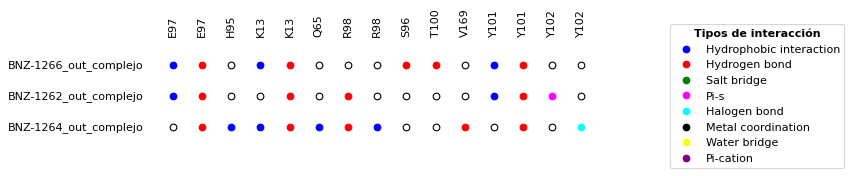

In [16]:
# --------------------------------- CREAR EL GRÁFICO ---------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.lines import Line2D
from matplotlib.font_manager import FontProperties

# Carga el DataFrame (asegúrate de que df esté ya definido con tus datos)
# df = pd.read_csv("reporte_interacciones.csv")
data = df  # Asume que df ya ha sido cargado previamente

# Obtener nombres de compuestos desde la columna 'ligandos'
compounds = data["ligandos"].values

# Identificar columnas que representan interacciones
interaction_cols = [col for col in data.columns if "_" in col]

# Ordenar columnas por el residuo (segunda parte del nombre, después del guion bajo)
interaction_cols_sorted = sorted(interaction_cols, key=lambda x: x.split("_")[1])

# Dividir tipo de interacción y residuo
interaction_types = [col.split("_")[0] for col in interaction_cols_sorted]

# Colores por tipo de interacción (solo color, no estilos)
interaction_colors = {
    'HI': "blue",     # Hydrophobic interaction
    'HB': "red",      # Hydrogen bond
    'SB': "green",    # Salt bridge
    'π-s': "magenta", # Pi-sulfur
    'HalB': "cyan",   # Halogen bond
    'Met': "black",   # Metal coordination
    'WB': "yellow",   # Water bridge
    'π-c': "purple"   # Pi-cation
}

# Nombres completos para la leyenda
interaction_names = {
    'HI': "Hydrophobic interaction",
    'HB': "Hydrogen bond",
    'SB': "Salt bridge",
    'π-s': "Pi-s",
    'HalB': "Halogen bond",
    'Met': "Metal coordination",
    'WB': "Water bridge",
    'π-c': "Pi-cation"
}

# Preparar mapeo de columnas a posiciones y estilos
interaction_plot = [
    (i, 0, interaction_colors.get(interaction_types[i], "black"))
    for i in range(len(interaction_cols_sorted))
]

# Plot
figure(figsize=(8, 2), dpi=80)
for row_idx, compound in enumerate(compounds):
    plt.text(-1, -row_idx, compound, ha="right", va="center")

    # Acceder a la fila correspondiente por nombre del ligando
    row_values = data.loc[data["ligandos"] == compound, interaction_cols_sorted].values[0]

    for i, present in enumerate(row_values):
        x, y, color = interaction_plot[i]
        y_pos = y - row_idx
        if present > 0:
            plt.plot(x, y_pos, 'o', color=color)
        else:
            plt.plot(x, y_pos, 'o', color="black", mfc="none")

# Etiquetas de residuo en la parte superior
plt.axis([-1, len(interaction_cols_sorted) + 1, -len(compounds), 1])
for i, col in enumerate(interaction_cols_sorted):
    plt.text(i, 1, col.split("_")[1], rotation=90, ha="center")

# Crear leyenda centrada en el lado derecho
handles = []
labels = []
for key, color in interaction_colors.items():
    handles.append(Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=color, markersize=8))
    labels.append(interaction_names.get(key, key))

bold_font = FontProperties(weight='bold')

plt.legend(handles, labels,
           title="Tipos de interacción",
           title_fontproperties=bold_font,
           bbox_to_anchor=(1.05, 0.5),
           loc='center left')

plt.axis('off')
plt.savefig("Interacciones.png", bbox_inches='tight', dpi=300)